In [1]:
import numpy as np

In [2]:
def calculate_distance(x1, y1, x2, y2):
  dist = np.sqrt(pow(np.subtract(x1, x2), 2) + pow(np.subtract(y1, y2), 2))
  return dist 

def idw(dist, mag, scale):
  dist = np.array(dist)
  temp = np.linspace(0,1,num=1000 )
  mag = np.array(mag)
  up = np.sum(np.multiply(mag, pow(np.divide(1, dist), scale)))  
  down = np.sum(pow(np.divide(1, dist), scale ) )
  val = up/down
  return val


In [6]:
def calculate(size_x, size_y, X, Y, mag, scale):
  grid_orignal = np.zeros((size_x, size_y))
  k=0
  len_X = len(X)
  len_Y = len(Y)
  for i, j in np.array(list(zip(X,Y))):
    grid_orignal[i][j] = mag[k]
    k = k+ 1
  
  grid = np.copy(grid_orignal)
  for i in range(size_x):
    for j in range(size_y):
      dist = calculate_distance(np.array(len_X*[i]), np.array(len_Y*[j]), np.array(X), np.array(Y))
      grid[i][j] = idw(dist, mag, scale)

  k=0
  for i, j in np.array(list(zip(X,Y))):
    temp = mag[k]
    grid[i][j] = temp
    k = k+ 1
  
  return grid, grid_orignal

In [79]:
size_y = 200
size_x = 200
X = [80, 75, 7, 48, 50, 73, 35, 180, 175, 107, 148, 150, 173, 135, 199]
Y = [40, 60, 5, 7, 50, 95, 90, 140, 160, 105, 107, 150, 195, 190, 0]
mag = [-150, 150, -100, 130, 40, 90, 80, 250, -50, -200, 230, 140, 190, 180, -250]
scale = 2
grid, grid_orignal = calculate(size_x, size_y, Y, X, mag, scale)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


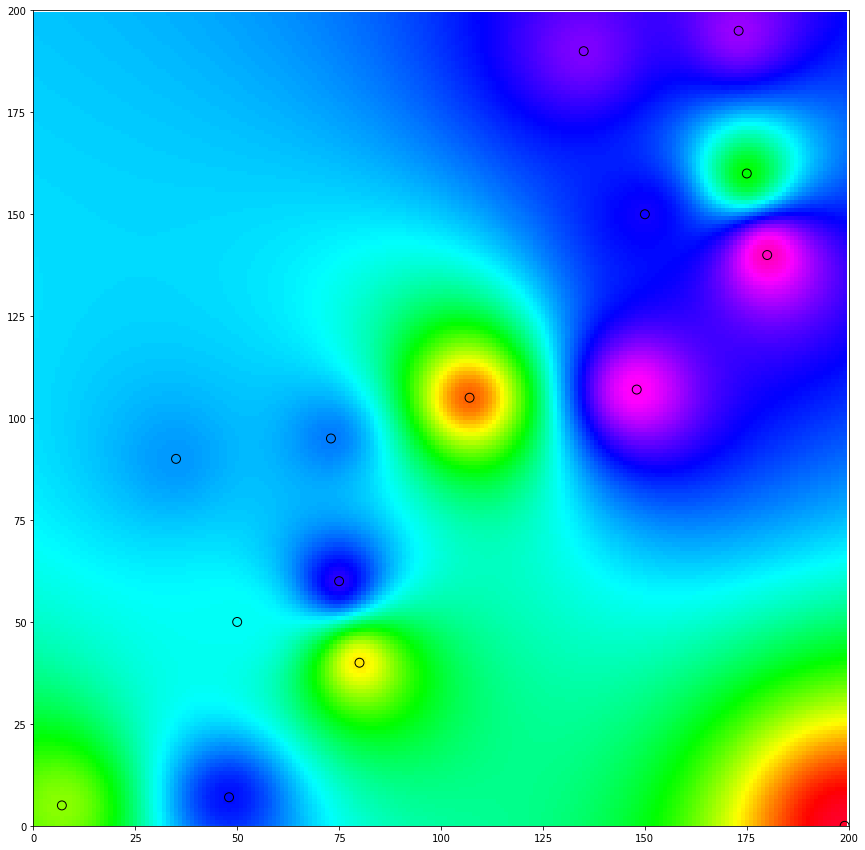

In [80]:
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(15, 15))
#ax = sns.heatmap(grid, linewidth=0,cmap="gist_rainbow")
#ax.tick_params(axis='both', which='both', length=0)
plt.scatter(X, Y, s=80, facecolors='none', edgecolors='k')
plt.imshow(grid,cmap='gist_rainbow')
plt.ylim(0,size_x)
plt.xlim(0,size_y)
plt.show()